In [294]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
df_pump = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')
df_pump

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [296]:
# Load training labels
df_label = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')
df_label

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


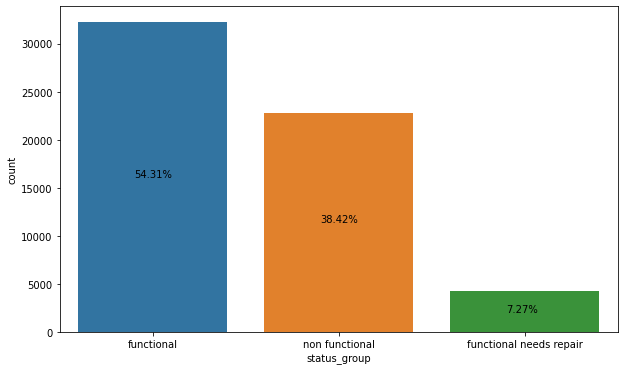

In [297]:
#plot the target variable to view
plt.subplots(figsize=(10,6))
ax = sns.countplot(x=df_label['status_group'])
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()*100/len(df_label)), (p.get_x()+0.3, p.get_height()*0.5))

In [298]:
# Merge labels with main data for ease in subsequent data clearning & transformation processes
df_pump = df_pump.merge(df_label, how='inner', on='id')
df_pump

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [299]:
df_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [300]:
df_pump.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [301]:
df_pump.isnull().sum()/len(df_pump)*100

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

<AxesSubplot: >

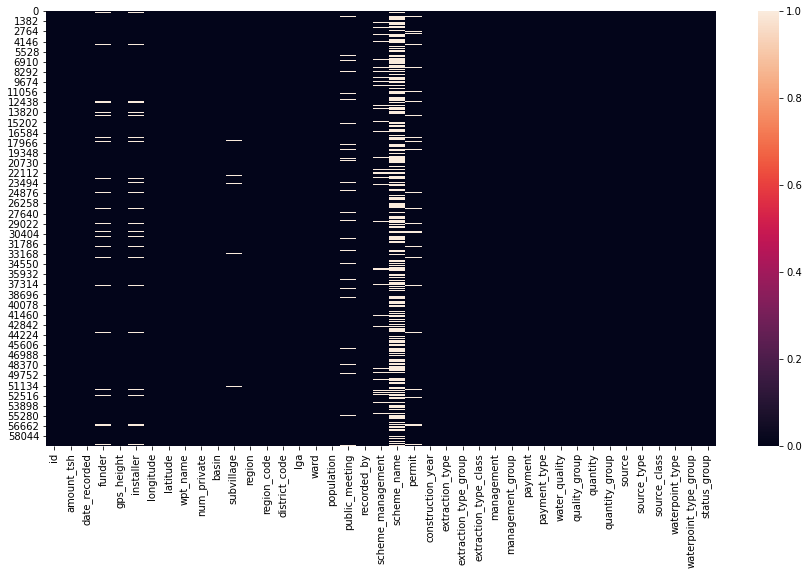

In [302]:
# Get visual sense of null data
plt.subplots(figsize=(15,8))
sns.heatmap(df_pump.isnull())

In [303]:
# Describe all columns to get top frequencies, min/max, means, deviations
df_pump.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,59400.0,NaN,NaN,NaN,37115.131768,21453.128371,0.0,18519.75,37061.5,55656.5,74247.0
amount_tsh,59400.0,NaN,NaN,NaN,317.650385,2997.574558,0.0,0.0,0.0,20.0,350000.0
date_recorded,59400,356,2011-03-15,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,55765,1897,Government Of Tanzania,9084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400.0,NaN,NaN,NaN,668.297239,693.11635,-90.0,0.0,369.0,1319.25,2770.0
installer,55745,2145,DWE,17402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400.0,NaN,NaN,NaN,34.077427,6.567432,0.0,33.090347,34.908743,37.178387,40.345193
latitude,59400.0,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-0.0
wpt_name,59400,37400,none,3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400.0,NaN,NaN,NaN,0.474141,12.23623,0.0,0.0,0.0,0.0,1776.0


In [304]:
df_pump.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [305]:
# Fill NaN value with the mode. (most repeated)
df_pump['funder'].fillna(df_pump['funder'].mode()[0], inplace=True)

In [306]:
df_pump['funder'].unique()

array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

In [307]:
df_pump.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [308]:
# Fill NaN value with the mode. (most repeated)
df_pump['installer'].fillna(df_pump['installer'].mode()[0], inplace=True)

In [309]:
# Fill NaN value with the mode. (most repeated)
df_pump['subvillage'].fillna(df_pump['subvillage'].mode()[0], inplace=True)

In [310]:
# Fill NaN value with the mode. (most repeated)
df_pump['public_meeting'].fillna(df_pump['public_meeting'].mode()[0], inplace=True)

In [311]:
# Fill NaN value with the mode. (most repeated)
df_pump['scheme_management'].fillna(df_pump['scheme_management'].mode()[0], inplace=True)

In [312]:
# Fill NaN value with the mode. (most repeated)
df_pump['scheme_name'].fillna(df_pump['scheme_name'].mode()[0], inplace=True)

In [313]:
# Fill NaN value with the mode. (most repeated)
df_pump['permit'].fillna(df_pump['permit'].mode()[0], inplace=True)

In [314]:
df_pump.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [315]:
df_pump

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,Government Of Tanzania,0,DWE,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


<ipython-input-316-c2e766b8a24f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_pump[['id','amount_tsh','date_recorded','funder', 'gps_height', 'installer','longitude','latitude','wpt_name','num_private' ,'basin', 'subvillage','region', 'region_code','district_code',


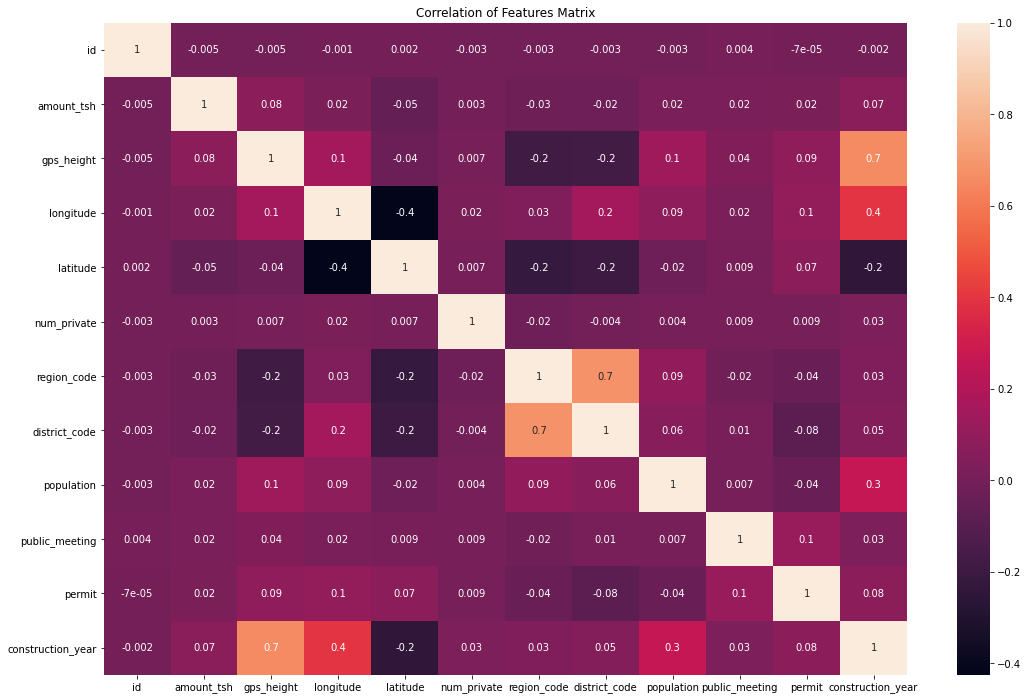

In [316]:
# Visualize Correlation with features Matrix 
corrMatrix = df_pump[['id','amount_tsh','date_recorded','funder', 'gps_height', 'installer','longitude','latitude','wpt_name','num_private' ,'basin', 'subvillage','region', 'region_code','district_code', 
            'lga','ward','population','public_meeting','recorded_by','scheme_management','scheme_name', 'permit','construction_year','extraction_type', 'extraction_type_group','extraction_type_class', 'management', 'management_group','payment','payment_type', 'water_quality','quality_group', 'quantity', 'quantity_group','source','source_type',
            'source_class','waterpoint_type', 'waterpoint_type_group', 'status_group']].corr()
plt.subplots(figsize=(18,12))
sns.heatmap(corrMatrix, annot=True, fmt='.1g')
plt.title('Correlation of Features Matrix')
plt.show()

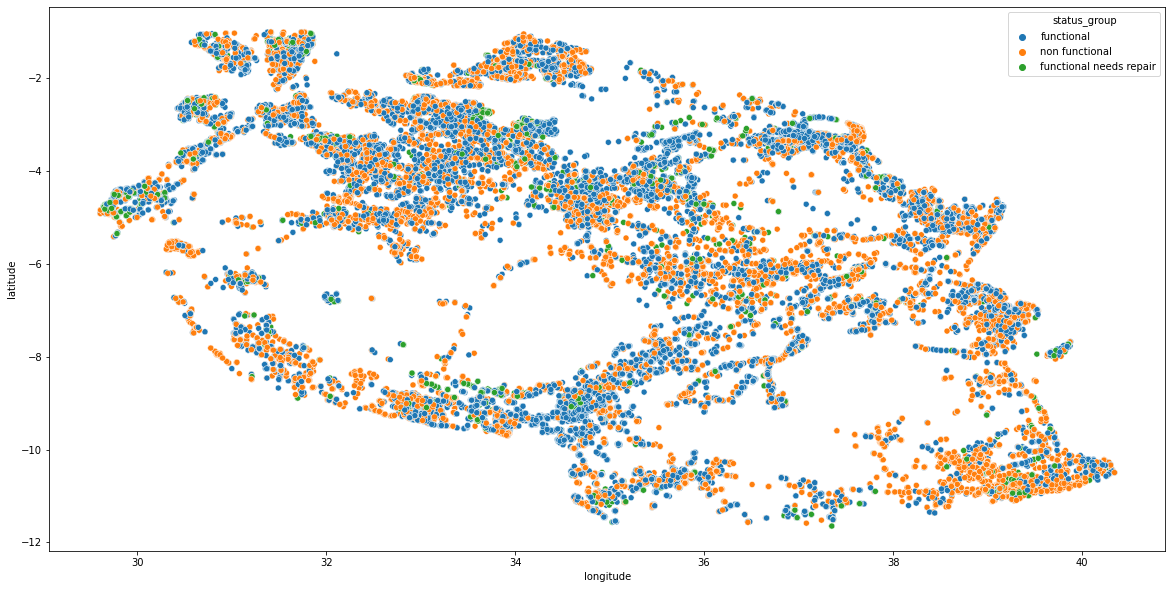

In [317]:
fig, ax  = plt.subplots(figsize=(20,10))
loc_data = df_pump.loc[(df_pump.longitude>0) & (df_pump.latitude<0)]
sns.scatterplot(data=loc_data, x="longitude", y="latitude", hue="status_group", ax=ax);

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [319]:
df_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [320]:
from sklearn.preprocessing import MinMaxScaler
df_pump['public_meeting'] = df_pump['public_meeting'].astype(int)
df_pump['permit'] = df_pump['permit'].astype(int)

# Perform one-hot encoding on object (categorical) columns
object_columns = df_pump.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_pump, columns=object_columns)

# Scale numerical columns using Min-Max scaling
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
# df_pump.drop(columns=object_columns, inplace=True)
# Extract features from the date_recorded column
from sklearn.preprocessing import OrdinalEncoder


df_pump['date_recorded'] = pd.to_datetime(df_pump['date_recorded'])
df_pump['year_recorded'] = df_pump['date_recorded'].dt.year
df_pump['month_recorded'] = df_pump['date_recorded'].dt.month
df_pump['day_recorded'] = df_pump['date_recorded'].dt.day

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Select date-related columns for encoding
date_columns = ['year_recorded', 'month_recorded', 'day_recorded']

# Apply ordinal encoding to date-related columns
df_pump[date_columns] = ordinal_encoder.fit_transform(df_pump[date_columns])
# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([df_pump, df_encoded], axis=1)
# Print the first few rows of the encoded DataFrame
print(df_encoded.head().columns)

MemoryError: Unable to allocate 3.66 GiB for an array with shape (66170, 59400) and data type uint8

In [ ]:
df_encoded.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group_functional,status_group_functional needs repair,status_group_non functional
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,0,0,1,0,0,0,0,1,0,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,0,0,1,0,0,0,0,1,0,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,0,0,1,0,0,0,0,1,0,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,0,0,1,0,0,0,0,0,0,1
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
print(df_encoded.head().columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       ...
       'waterpoint_type_other', 'waterpoint_type_group_cattle trough',
       'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_dam',
       'waterpoint_type_group_hand pump',
       'waterpoint_type_group_improved spring', 'waterpoint_type_group_other',
       'status_group_functional', 'status_group_functional needs repair',
       'status_group_non functional'],
      dtype='object', length=66226)


In [ ]:
features=['id','amount_tsh','date_recorded','funder', 'gps_height', 'installer','longitude','latitude','wpt_name','num_private' ,'basin', 'subvillage','region', 'region_code','district_code', 
            'lga','ward','population','public_meeting','recorded_by','scheme_management','scheme_name', 'permit','construction_year','extraction_type', 'extraction_type_group','extraction_type_class', 'management', 'management_group','payment','payment_type', 'water_quality','quality_group', 'quantity', 'quantity_group','source','source_type',
            'source_class','waterpoint_type', 'waterpoint_type_group']
target = ['status_group']

df_pump_X = df_encoded[features]
df_pump_Y = df_encoded[target]

df_pump_X.head()

,id,id,amount_tsh,amount_tsh,date_recorded,funder,gps_height,gps_height,installer,longitude,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,0.937034,6000.0,0.017143,2011-03-14,Roman,1390,0.517483,Roman,34.938093,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.118200,0.0,0.000000,2013-03-06,Grumeti,1399,0.520629,GRUMETI,34.698766,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,0.462106,25.0,0.000071,2013-02-25,Lottery Club,686,0.271329,World vision,37.460664,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.912401,0.0,0.000000,2013-01-28,Unicef,263,0.123427,UNICEF,38.486161,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.265708,0.0,0.000000,2011-07-13,Action In A,0,0.031469,Artisan,31.130847,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
df_pump_Y.head()

,status_group
0,functional
1,functional
2,functional
3,non functional
4,functional


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_pump_X, df_pump_Y, 
                                                    random_state=1, stratify= df_pump_Y, 
                                                    test_size = 0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(39798, 52) (39798, 1)
(19602, 52) (19602, 1)


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train.values.ravel())

TypeError: float() argument must be a string or a number, not 'Timestamp'